In [96]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import seaborn as sns
rcParams['figure.figsize']=10,6




In [31]:
from google.colab import drive
drive.mount('/content/gdrive')
Location="/content/gdrive/MyDrive/Colab Notebooks/AirPassengers.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
dataset=pd.read_csv(Location)

**Data Exploration**

In [33]:
#Parse strings to datetime type
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [34]:
indexedDataset = dataset.set_index('Month')  
indexedDataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [35]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [36]:
indexedDataset.tail() 

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [37]:
indexedDataset.size

144

In [38]:
indexedDataset.dtypes

#Passengers    int64
dtype: object

In [39]:
indexedDataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [40]:
#Checking for null values
indexedDataset.isnull().sum()

#Passengers    0
dtype: int64

In [41]:
indexedDataset.columns

Index(['#Passengers'], dtype='object')

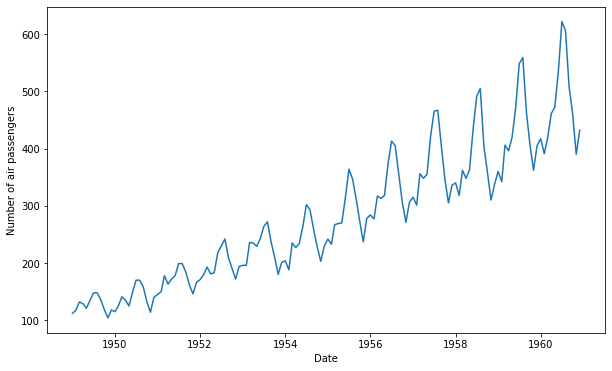

In [42]:
#Plot Graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

**Checking for Stationarity**

In [43]:
rollmean=indexedDataset.rolling(window=12).mean()

rollstd=indexedDataset.rolling(window=12).std()
print(rollmean,rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


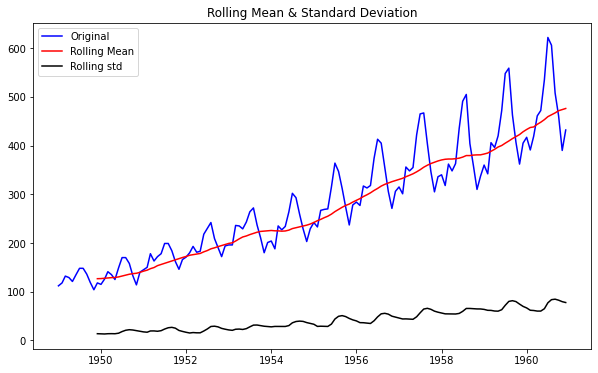

In [44]:
#Plot rolling statistics
orig=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rollmean, color='red', label='Rolling Mean')
std=plt.plot(rollstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [45]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


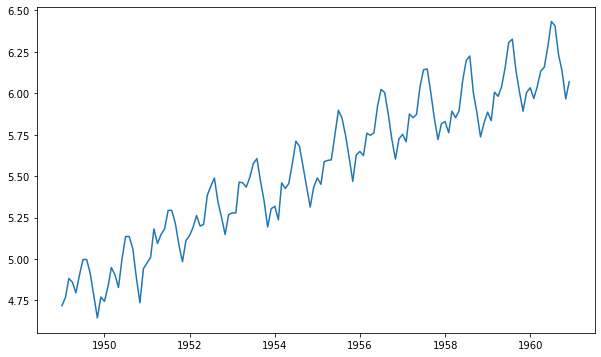

In [46]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

**Smoothing: Moving Average**

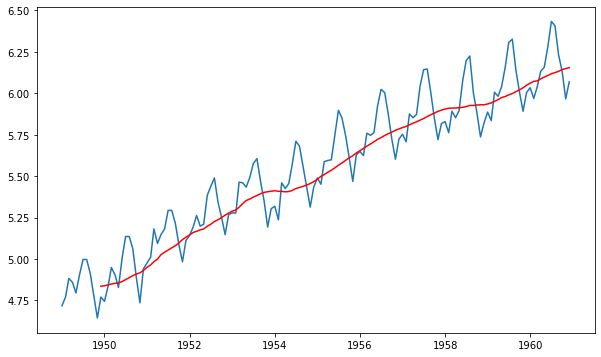

In [47]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [48]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [49]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

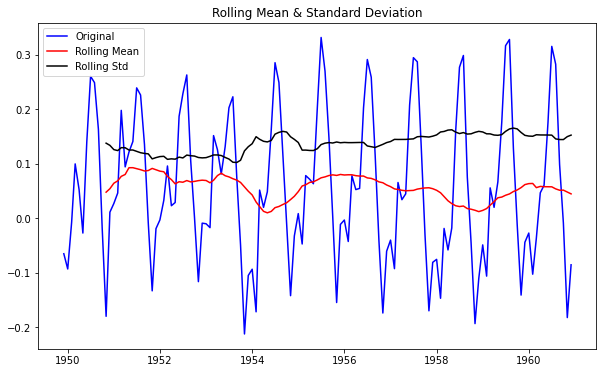

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [50]:
test_stationarity(datasetLogScaleMinusMovingAverage)

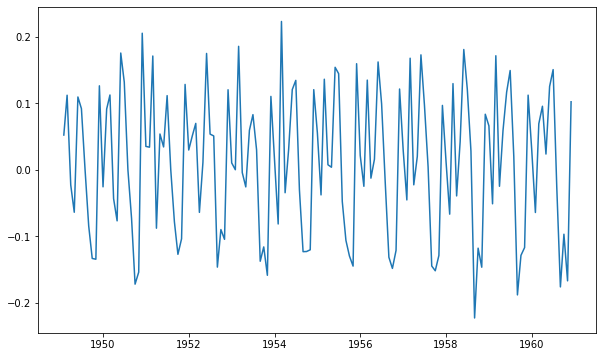

In [51]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

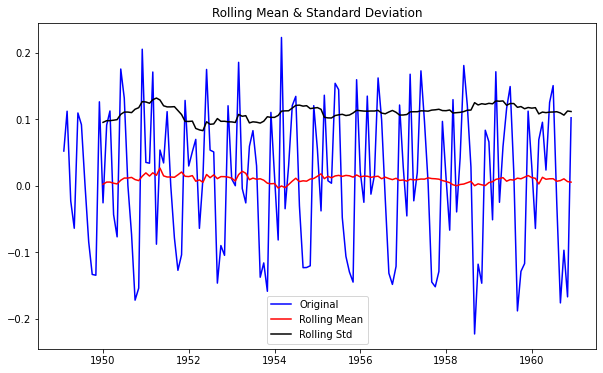

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [52]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

**Decomposition of a time series data into its components: trend, seasonality, and noise.**

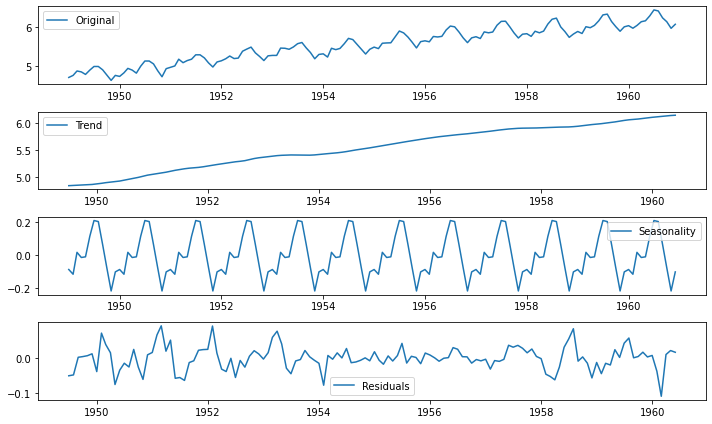

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Example 2**

**Exploratory Data Analysis-Rectangular Data**

In [54]:
installations

NameError: ignored

In [55]:
pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt

In [57]:
#Mounting Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
Location = "/content/gdrive/MyDrive/Colab Notebooks/data.csv"
df = pd.read_csv(Location)
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


**Estimates of Height and weight**

Compute the mean, trimmed mean, and median for Height & Wieght. For mean and median we can use the pandas methods of the data frame. The trimmed mean requires the trim_mean function in scipy.stats.

In [59]:
print(df['height'].mean())

164.35922857142856


In [60]:
print(trim_mean(df['height'], 0.1))

164.3225892857143


In [61]:
print(df['height'].median())

165.0


In [62]:
print(df['weight'].mean())

74.20569


In [63]:
print(np.average(df['weight'], weights=df['height']))

74.4149224416622


Weighted mean is available with numpy. For weighted median, we can use the specialised package wquantiles

In [64]:
print(wquantiles.median(df['weight'], weights=df['height']))

72.0


**Estimates of Variability**

Standard deviation

In [65]:
print(df['height'].std())

8.210126364538038


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [66]:
print(df['height'].quantile(0.75) - df['height'].quantile(0.25))

11.0


Median absolute deviation from the median can be calculated with a method in statsmodels

In [67]:
print(robust.scale.mad(df['height']))
print(abs(df['height'] - df['height'].median()).median() / 0.6744897501960817)

7.41301109252801
7.41301109252801


**Percentiles and Boxplots**

Pandas has the quantile method for data frames.

In [68]:
print(df['weight'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     55.0
0.25     65.0
0.50     72.0
0.75     82.0
0.95    100.0
Name: weight, dtype: float64


In [69]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df1 = pd.DataFrame(df['weight'].quantile(percentages))
df1.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

                    0             1             2             3      \
id               0.000000      1.000000      2.000000      3.000000   
age_days     18393.000000  20228.000000  18857.000000  17623.000000   
age_year        50.391781     55.419178     51.663014     48.282192   
gender           2.000000      1.000000      1.000000      2.000000   
height         168.000000    156.000000    165.000000    169.000000   
weight          62.000000     85.000000     64.000000     82.000000   
ap_hi          110.000000    140.000000    130.000000    150.000000   
ap_lo           80.000000     90.000000     70.000000    100.000000   
cholesterol      1.000000      3.000000      3.000000      1.000000   
gluc             1.000000      1.000000      1.000000      1.000000   
smoke            0.000000      0.000000      0.000000      0.000000   
alco             0.000000      0.000000      0.000000      0.000000   
active           1.000000      1.000000      0.000000      1.000000   
cardio

Pandas provides a number of basic exploratory plots; one of them are boxplots

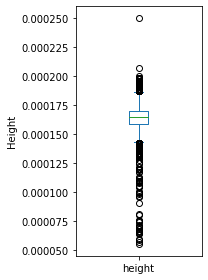

In [70]:
ax = (df['height']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Height')

plt.tight_layout()
plt.show()

**Frequency Table and Histograms**


The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [71]:
binnedHeight = pd.cut(df['height'], 10)
print(binnedHeight.value_counts())

(152.5, 172.0]    55630
(172.0, 191.5]     9954
(133.0, 152.5]     4249
(113.5, 133.0]       65
(191.5, 211.0]       52
(94.0, 113.5]        24
(54.805, 74.5]       19
(74.5, 94.0]          6
(230.5, 250.0]        1
(211.0, 230.5]        0
Name: height, dtype: int64


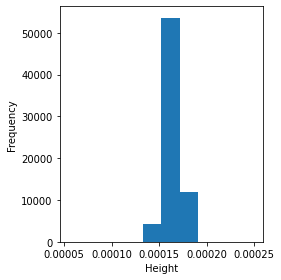

In [72]:
ax = (df['height'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Height')

plt.tight_layout()
plt.show()

**Density Estimates**

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument bw_method to control the smoothness of the density curve.

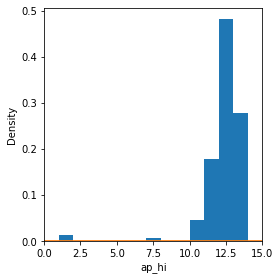

In [73]:
ax = df['ap_hi'].plot.hist(density=True, xlim=[0, 15], 
                                    bins=range(1,15), figsize=(4, 4))
df['ap_hi'].plot.density(ax=ax)
ax.set_xlabel('ap_hi')

plt.tight_layout()
plt.show()

In [74]:
dfn1 = df[['height','weight']]
dfn1.head()

,height,weight
0,168,62.0
1,156,85.0
2,165,64.0
3,169,82.0
4,156,56.0


In [75]:
dfn2 = df[['ap_hi','ap_lo']]
dfn2.head()


,ap_hi,ap_lo
0,110,80
1,140,90
2,130,70
3,150,100
4,100,60


In [77]:
print(100 * dfn1 / dfn1.values.sum())

         height    weight
0      0.001006  0.000371
1      0.000934  0.000509
2      0.000988  0.000383
3      0.001012  0.000491
4      0.000934  0.000335
...         ...       ...
69995  0.001006  0.000455
69996  0.000946  0.000755
69997  0.001096  0.000629
69998  0.000976  0.000431
69999  0.001018  0.000431

[70000 rows x 2 columns]


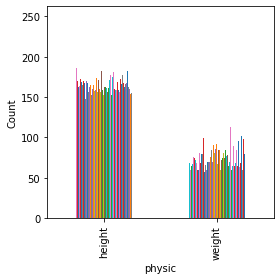

In [78]:
ax = dfn1.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('physic')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [79]:
data=df.corr()
print(data)

                   id  age_days  age_year    gender    height    weight  \
id           1.000000  0.003457  0.003457  0.003502 -0.003038 -0.001830   
age_days     0.003457  1.000000  1.000000 -0.022811 -0.081515  0.053684   
age_year     0.003457  1.000000  1.000000 -0.022811 -0.081515  0.053684   
gender       0.003502 -0.022811 -0.022811  1.000000  0.499033  0.155406   
height      -0.003038 -0.081515 -0.081515  0.499033  1.000000  0.290968   
weight      -0.001830  0.053684  0.053684  0.155406  0.290968  1.000000   
ap_hi        0.003356  0.020764  0.020764  0.006005  0.005488  0.030702   
ap_lo       -0.002529  0.017647  0.017647  0.015254  0.006150  0.043710   
cholesterol  0.006106  0.154424  0.154424 -0.035821 -0.050226  0.141768   
gluc         0.002467  0.098703  0.098703 -0.020491 -0.018595  0.106857   
smoke       -0.003699 -0.047633 -0.047633  0.338135  0.187989  0.067780   
alco         0.001210 -0.029723 -0.029723  0.170966  0.094419  0.067113   
active       0.003755 -0.

The seaborn package provides a convenient implementation for heatmaps.

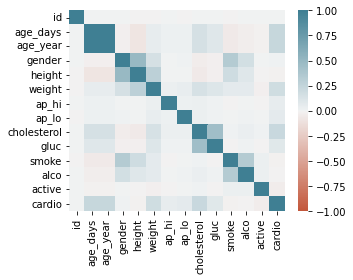

In [80]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

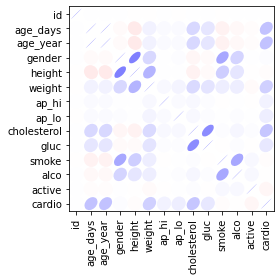

In [81]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
  
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
         
    return ec

m = plot_corr_ellipses(df.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()


#Scatterplots
Simple scatterplots are supported by pandas. Specifying the marker as $\u25EF$ uses an open circle for each point.

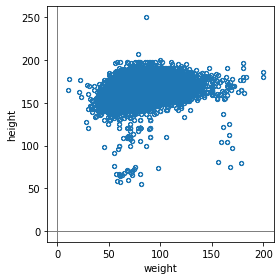

In [82]:
ax = dfn1.plot.scatter(x='weight', y='height', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('weight')
ax.set_ylabel('height')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


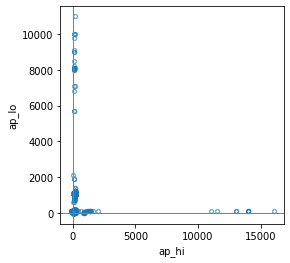

In [83]:
ax = dfn2.plot.scatter(x='ap_hi', y='ap_lo', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ap_hi')
ax.set_ylabel('ap_lo')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

#Hexagonal binning and Contours
Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

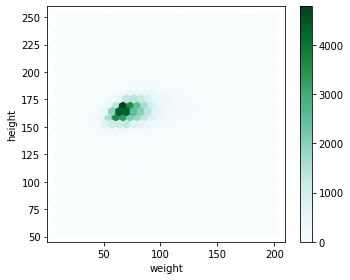

In [84]:
ax = dfn1.plot.hexbin(x='weight', y='height',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('weight')
ax.set_ylabel('height')

plt.tight_layout()
plt.show()

ValueError: ignored

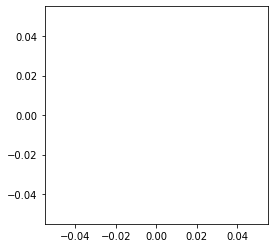

In [87]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=dfn2, x='ap_hi', y='ap_lo', ax=ax)
ax.set_xlabel('ap_hi')
ax.set_ylabel('ap_lo')

plt.tight_layout()
plt.show()

#Two Categorical Variables
Load the AirQuality dataset

In [93]:
Location = "/content/drive/MyDrive/Colab Notebooks/city_temperature.csv"
df1 = pd.read_csv(Location)
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9


In [99]:
crosstab = df1.pivot_table(index='Month', columns='AvgTemperature', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

                  City                                                        \
AvgTemperature   -99.0 -50.0 -49.1 -47.7 -46.9 -46.2 -45.9 -45.8 -45.6 -44.7   
Month                                                                          
1.0             6464.0   NaN   NaN   1.0   1.0   1.0   NaN   1.0   1.0   1.0   
2.0             5594.0   NaN   1.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
3.0             6220.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4.0             6157.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5.0             6761.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6.0             6750.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7.0             5962.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8.0             6281.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9.0             6204.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10.0            6140.0   NaN   NaN   NaN

#Categorical and Numeric Data
Pandas boxplots of a column can be grouped by a different column.#Categorical and Numeric Data
Pandas boxplots of a column can be grouped by a different column.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


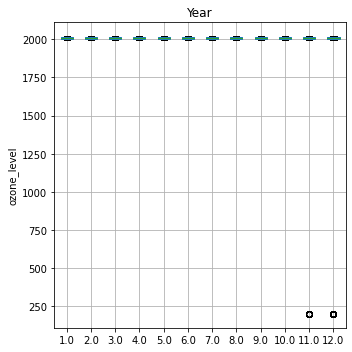

In [101]:
ax = df1.boxplot(by='Month', column='Year',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('ozone_level')
plt.suptitle('')

plt.tight_layout()
plt.show()

Pandas also supports a variation of boxplots called violinplot.

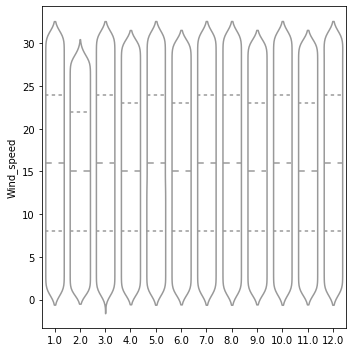

In [103]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=df1, x='Month', y='Day',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Wind_speed')

plt.tight_layout()
plt.show()

**Example 3**


### Import Libraries

Let's import some libraries to get started!

In [104]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

### The Data

Let's start by reading in the diamods.csv file into a pandas dataframe.

In [106]:
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamond.csv')
diamonds.head()

,_c0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [107]:
diamonds.shape

(1000, 11)

So, We have 53,940 rows and 10 columns

In [108]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _c0      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      1000 non-null   object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    1000 non-null   int64  
 8   x        1000 non-null   float64
 9   y        1000 non-null   float64
 10  z        1000 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 86.1+ KB


## Data Cleaning and Pre-processing

### Deleting the Index row

In [109]:
diamonds.drop(['id'] , axis=1 , inplace=True)
diamonds.head()

KeyError: ignored

### Missing Data


In [110]:
diamonds.isnull().sum()


_c0        0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### We want to fill in missing numeric data instead of dropping the missing numeric rows. So, we can replace nan values with mean or median in this features.


In [111]:
diamonds.fillna(value=diamonds[['carat','price']].mean(), inplace=True)

In [112]:
diamonds.isnull().sum()

_c0        0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### We can replace nan values with mode because we have very less no.of nan values in categorical columns.


In [115]:
diamonds['color']= diamonds['color'].fillna(diamonds['color'].mode()[0])
diamonds['cut']= diamonds['cut'].fillna(diamonds['cut'].mode()[0])

In [114]:
diamonds.isnull().sum()

_c0        0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Compute the mean, trimmed mean, and median for Price. For mean and median we can use the pandas methods of the data frame. The trimmed mean requires the trim_mean function in scipy.stats.

In [116]:
print(diamonds['price'].mean())

2476.54


In [117]:
print(trim_mean(diamonds['price'], 0.1))

2679.0125


In [118]:
print(diamonds['price'].median())

2818.0


In [119]:
print(diamonds['carat'].mean())

0.68928


In [120]:
print(np.average(diamonds['carat'], weights=diamonds['price']))

0.7459984938664427


In [121]:
print(wquantiles.median(diamonds['carat'], weights=diamonds['price']))

0.72


## Estimates of Variability


In [122]:
print(diamonds.head(8))

   _c0  carat        cut color clarity  depth  table  price     x     y     z
0    1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1    2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2    3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3    4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4    5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5    6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6    7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7    8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53


Standard deviation


In [123]:
print(diamonds['price'].std())

839.5756199542849


Interquartile range is calculated as the difference of the 75% and 25% quantile.


In [124]:
print(diamonds['price'].quantile(0.75) - diamonds['price'].quantile(0.25))

79.0


Median absolute deviation from the median can be calculated with a method in statsmodels.


In [125]:
print(robust.scale.mad(diamonds['price']))
print(abs(diamonds['price'] - diamonds['price'].median()).median() / 0.6744897501960817)

59.30408874022408
59.30408874022408


## Percentiles and Boxplots
Pandas has the quantile method for data frames.

In [126]:
print(diamonds['carat'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    0.279
0.25    0.700
0.50    0.710
0.75    0.790
0.95    1.000
Name: carat, dtype: float64


In [127]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(diamonds['carat'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

        5.0%  25.0%  50.0%  75.0%  95.0%
carat  0.279    0.7   0.71   0.79    1.0


## Correlation


In [128]:
diamonds.corr()


,_c0,carat,depth,table,price,x,y,z
_c0,1.000000,0.374113,0.018114,-0.028839,0.402230,0.388557,0.388451,0.385086
carat,0.374113,1.000000,0.095289,0.126982,0.857558,0.977595,0.972580,0.980886
depth,0.018114,0.095289,1.000000,-0.344723,-0.012583,-0.050331,-0.058411,0.211345
table,-0.028839,0.126982,-0.344723,1.000000,0.068059,0.132682,0.112755,0.031740
price,0.402230,0.857558,-0.012583,0.068059,1.000000,0.911142,0.917202,0.892919
x,0.388557,0.977595,-0.050331,0.132682,0.911142,1.000000,0.996223,0.964225
y,0.388451,0.972580,-0.058411,0.112755,0.917202,0.996223,1.000000,0.961984
z,0.385086,0.980886,0.211345,0.031740,0.892919,0.964225,0.961984,1.000000


### EXPLORATORY DATA ANALYSIS

Lets begin with some exploratory data analysis!

## Histogram

Text(0.5, 0, 'Prices')

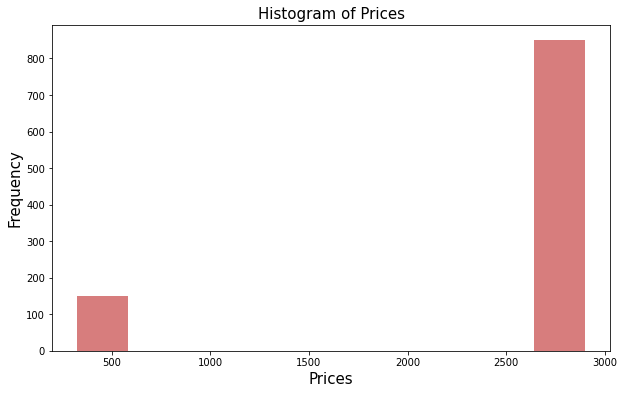

In [131]:
plt.figure()
plt.hist(x = "price", data = diamonds, color = "indianred", alpha = 0.8)
plt.title("Histogram of Prices", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Prices", fontsize = 15)

From the above graph, the distribution of prices is skewed to the right i.e as the prices increase, the number of diamonds decrease. We can carry out a skewness test using scipy's stats module to verify this.

## Countplot


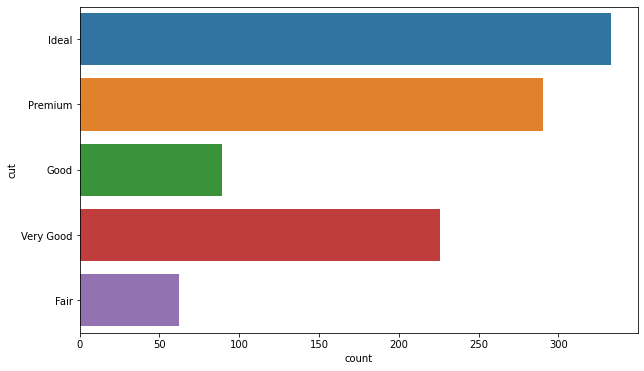

In [132]:
sns.countplot(y = diamonds.cut)
plt.show()

We have a lot of diamonds of ideal and premium cut quality.


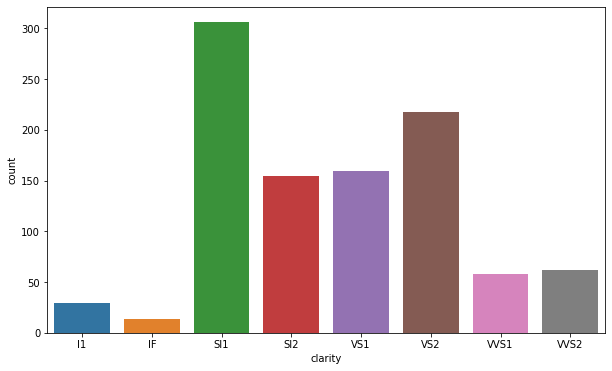

In [133]:
column_order = sorted(diamonds.clarity.unique())
sns.countplot(x="clarity", data = diamonds.sort_values(["price", "depth"]), order = column_order)

## Heatmap


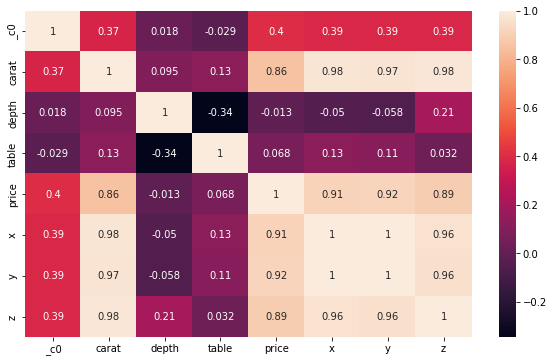

In [134]:
sns.heatmap(data = diamonds.corr(), annot = True)

we can use them to decide which features are more highly correlated.


## Categorical and Numeric Data


Pandas boxplots of a column can be grouped by a different column.


Text(0, 0.5, 'price')

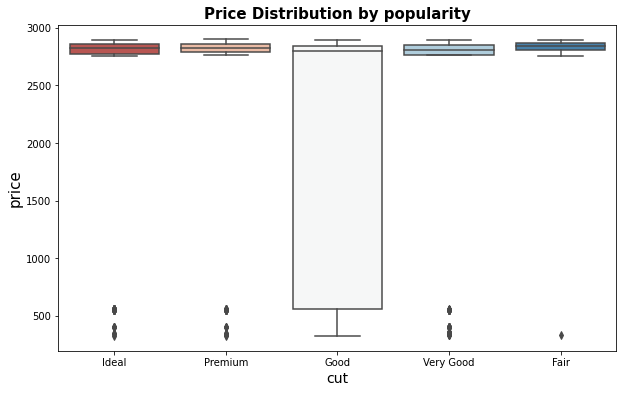

In [136]:
sns.boxplot(x="cut", y="price", data = diamonds, palette = "RdBu")
plt.title("Price Distribution by popularity", fontsize = 15, fontweight = "bold")
plt.xlabel("cut",size=14)
plt.ylabel("price", size = 15)

**Example 4**


In [137]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

There are several categories in the Superstore sales data, I start from time series analysis and forecasting for Technology sales.

We have a good 4-year furniture sales data.

In [145]:
location=("/content/drive/MyDrive/Colab Notebooks/Superstore.xlsx")
data_original = pd.read_excel(location)
data_original.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [146]:
data_original.shape

(9994, 21)

In [147]:
# categories of sales data
data_original.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [148]:
# copy only the rows related to category = Technology
Technology = data_original.loc[data_original['Category'] == 'Technology']
Technology.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6.0,0.2,90.7152
11,12.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4.0,0.2,68.3568
19,20.0,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3.0,0.2,16.0110
26,27.0,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3.0,0.0,11.7741
35,36.0,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7.0,0.2,123.4737


In [149]:
# data_original range
Technology['Order Date'].min(), Technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# **Data Exploration:**
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on

In [150]:
Technology.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [151]:
# columns to drop
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

Technology.drop(cols, axis=1, inplace=True)

In [152]:
Technology.sort_values('Order Date', inplace=True)
# check for null values
Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [153]:
Technology.columns
# Lets check if we have more than one sales data for a date:
temp = Technology.groupby('Order Date')['Sales'].size() 
temp[temp > 1].sort_values(ascending=False)

Order Date
2017-09-24    10
2017-07-03     9
2017-11-12     8
2016-11-24     8
2017-11-13     8
              ..
2016-03-06     2
2016-03-01     2
2016-02-22     2
2016-02-21     2
2016-06-04     2
Name: Sales, Length: 473, dtype: int64

In [154]:
# aggregate sales by date
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
# Indexing with Time Series Data
Technology = Technology.set_index('Order Date')
print(Technology.index)
print(Technology.sample(10))

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)
               Sales
Order Date          
2014-09-21  2286.338
2015-09-17  1024.838
2017-04-28   751.984
2014-06-18   139.800
2014-06-20   620.384
2016-03-26   119.976
2014-06-02   239.970
2017-12-03   364.070
2016-03-04   159.980
2017-02-24  1319.800


<Figure size 1152x432 with 0 Axes>

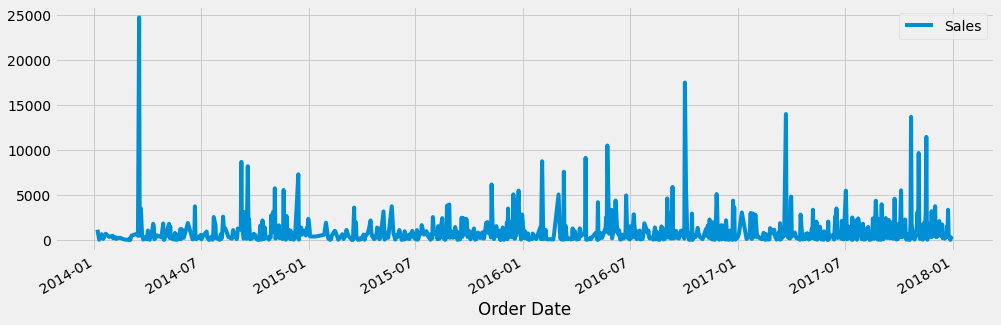

In [155]:
plt.figure(figsize=(16, 6));
Technology.plot();

DatetimeIndex can be used for the individual date/time components are all available as attributes such as year, month, day, and so on.


In [156]:
# Add columns with year, month, and weekday name
Technology['Year']         = pd.DatetimeIndex(Technology.index).year
Technology['Month']        = pd.DatetimeIndex(Technology.index).month

# Display a random sampling of 5 rows
Technology.sample(10, random_state=0)

,Sales,Year,Month
Order Date,,,
2014-07-23,2555.084,2014,7
2014-03-28,302.376,2014,3
2014-02-02,180.960,2014,2
2015-10-20,239.970,2015,10
2017-12-27,164.388,2017,12
2017-10-05,5520.506,2017,10
2017-07-21,2180.644,2017,7
2015-09-03,247.840,2015,9
2015-12-18,166.240,2015,12


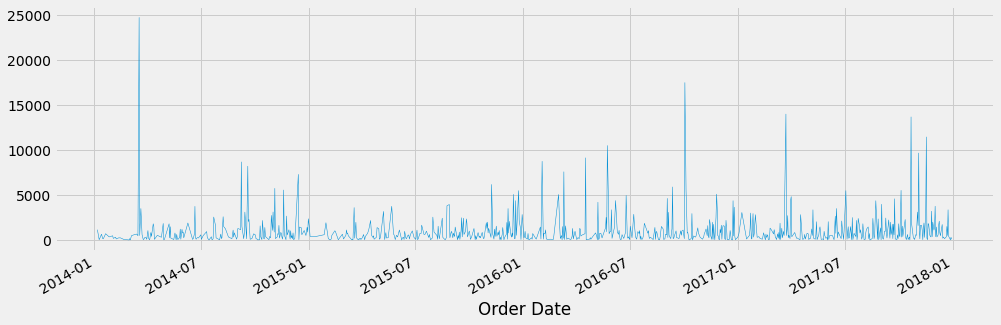

In [157]:
# create a line plot of the full time series of daily sales, 
# using the DataFrame’s plot() method.
Technology['Sales'].plot(linewidth=0.5);

# **Checking for seasonality**


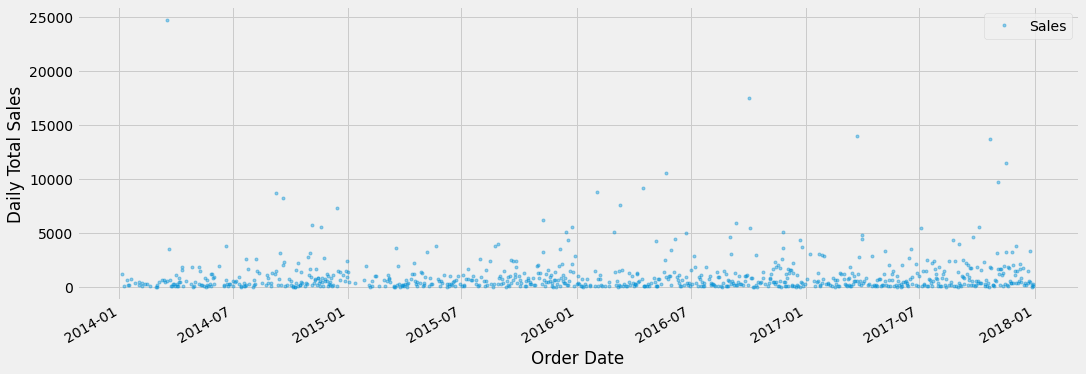

In [158]:
# Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(18, 6)})

cols_plot = ['Sales']

axes      = Technology[cols_plot].plot(marker='.',
                                       alpha=0.4, 
                                       linestyle='None', 
                                       figsize=(16, 6), 
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Sales')

**Checking Seasonality using Box-Plots:**


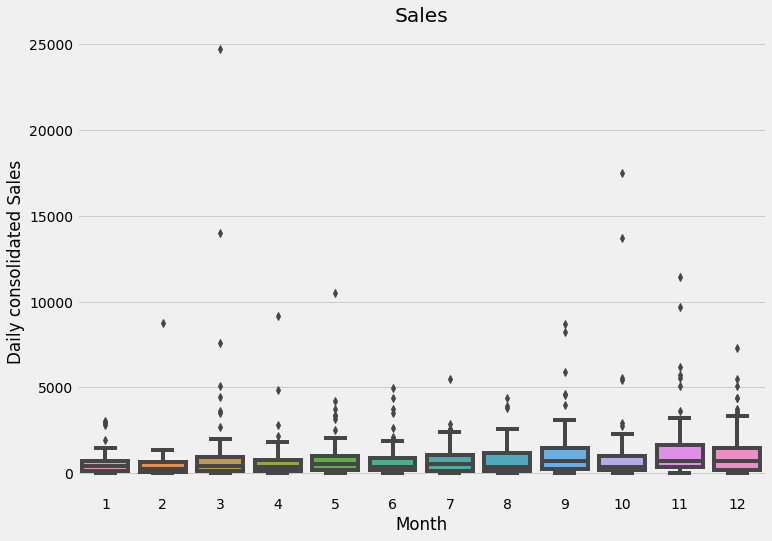

In [159]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=Technology, x='Month', y='Sales', ax=ax)

ax.set_title('Sales')

ax.set_ylabel('Daily consolidated Sales');

Now we try to plot the graph by the year starting from 2014 to 2017


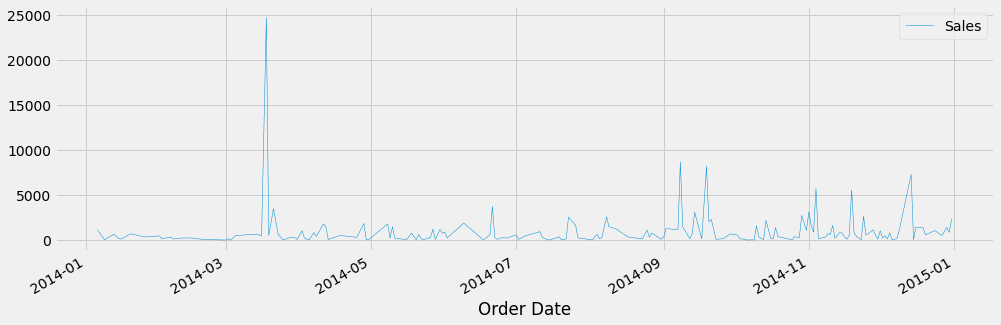

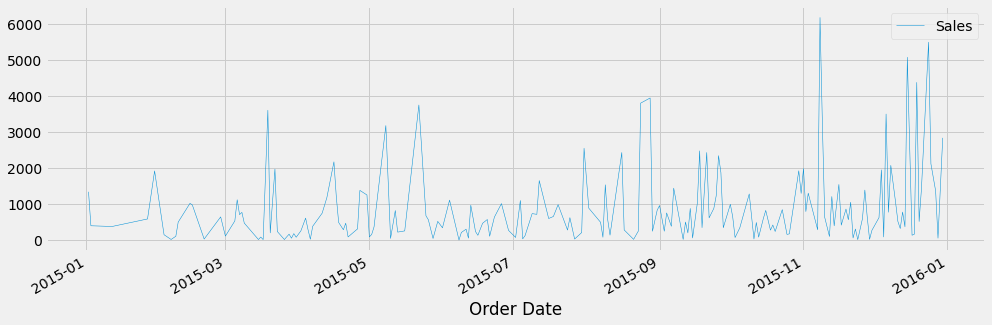

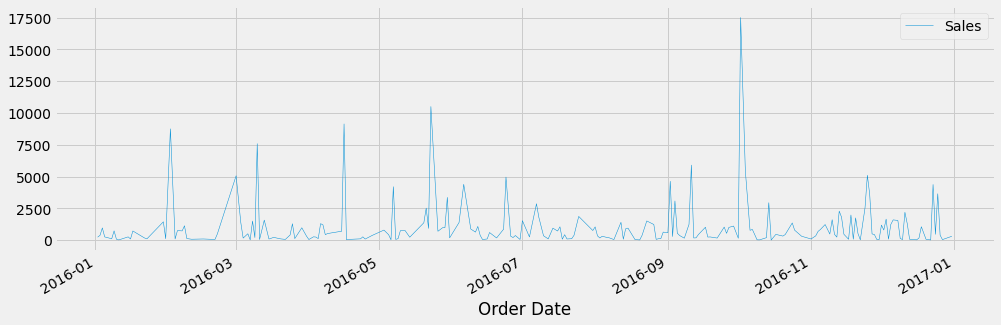

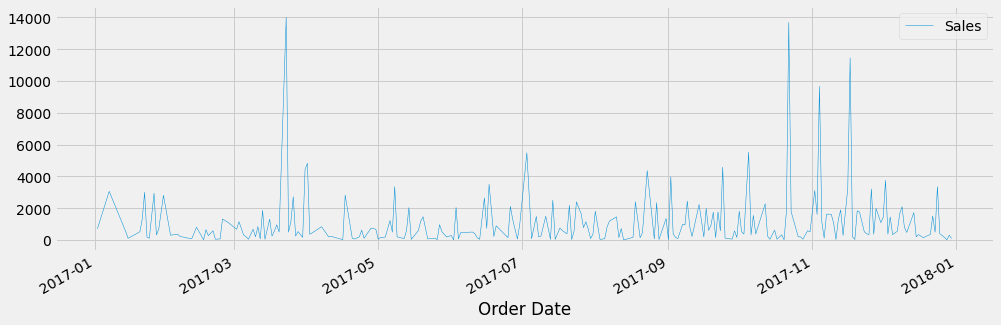

In [160]:
cols_plot = ['Sales']

Technology.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology.loc['2017'][cols_plot].plot(linewidth=0.5);

**observation:**

1.the trend, seasonality is not obvious from the above plots, as there are a lots of data points.

2.There seems to indication of seasonality at the end of the year 2015 and 2017, but we can not see the certain seasonality.

3.we can roll-up the data, weekly & monthly and then re-plot

# **sales - Monthly resampling**


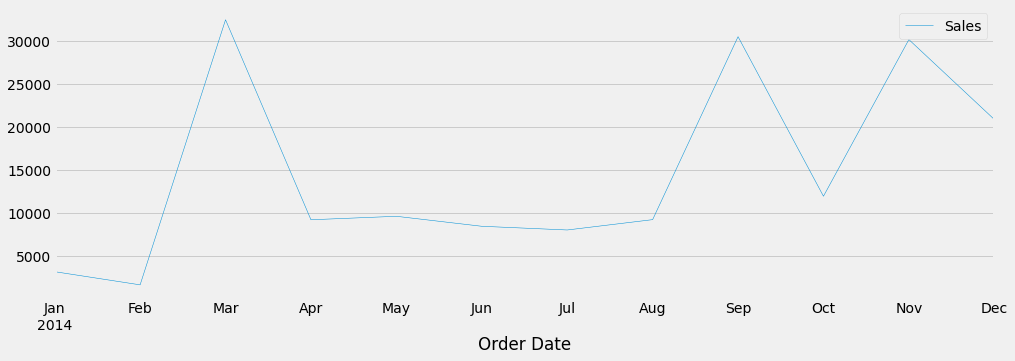

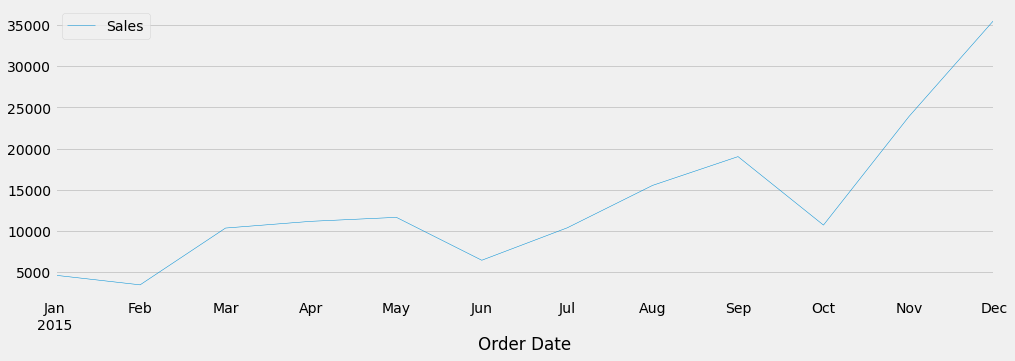

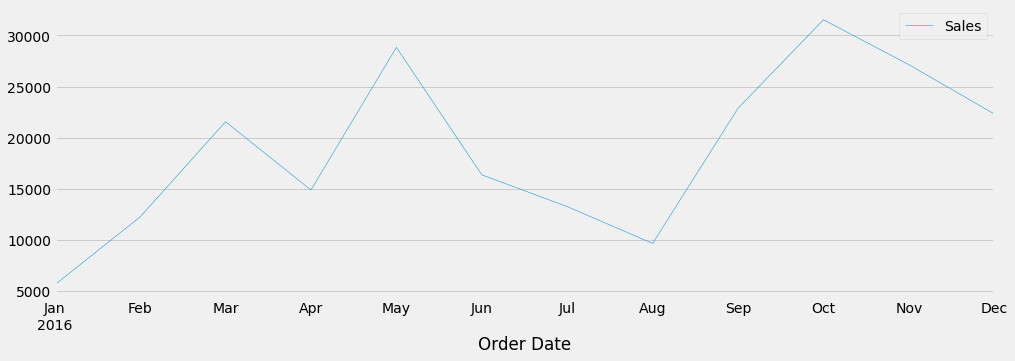

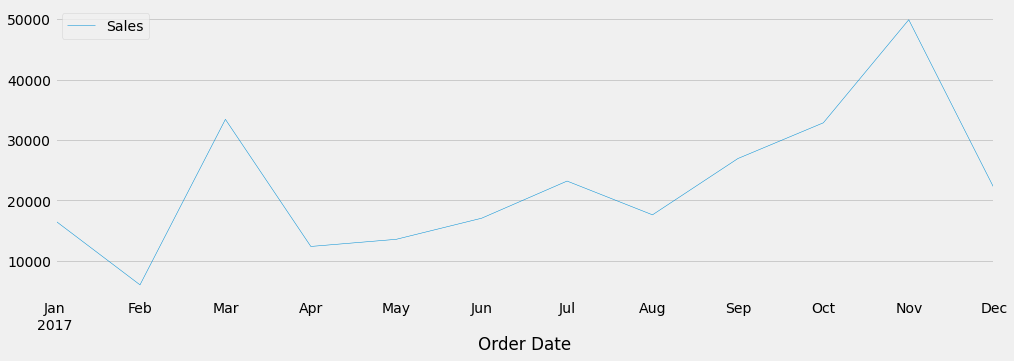

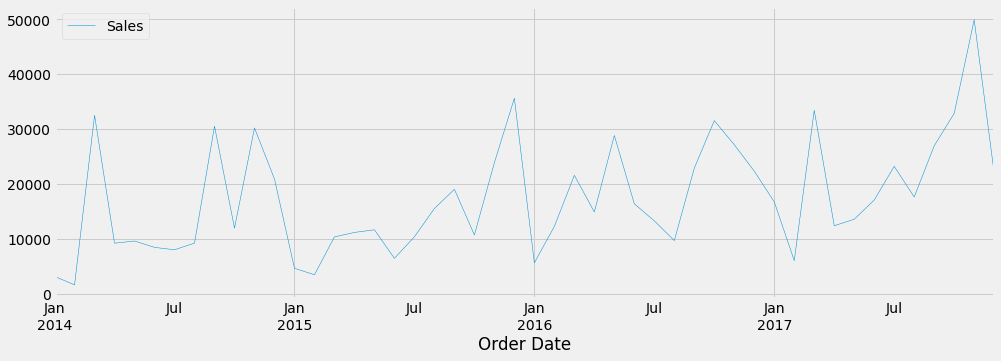

In [161]:
# monthly sales
data_columns = ['Sales']

# Resample to weekly frequency, aggregating with mean
Technology_monthly = Technology[data_columns].resample('M').sum()
Technology_monthly.head(3)

cols_plot = ['Sales']

Technology_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_monthly[cols_plot].plot(linewidth=0.5);

**observation**

1.Every year, there is slight uptrend visible

2.sales up in the months of Sep-Oct-Nov

3.Consolidated 4 years - slight uptrend in sales numbers

4.sales picks up in the last QTR of every calender year(Except December), indicates seasonality

# **Stationary test**
1.Data points are often non-stationary or have means, variances and covariances that change over time.

2.Non-stationary behaviors can be trends, cycles, random walks or combinations of the three.

3.Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted.



Stationarity test : Method 1 : Plots


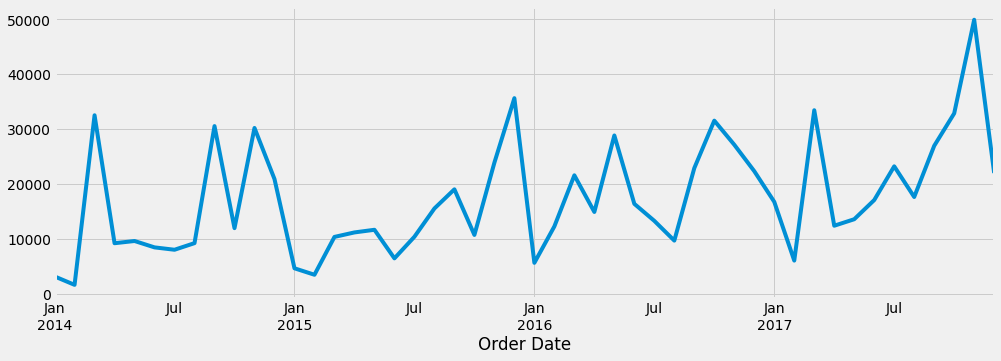

In [162]:
Technology_monthly['Sales'].plot();

Stationarity test : Method 2 : Summary Statistics


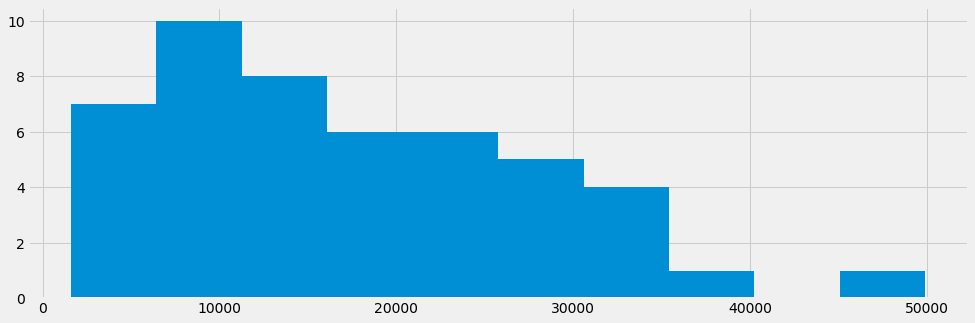

In [163]:
Technology_monthly['Sales'].hist();

In [164]:
X = Technology_monthly['Sales'].values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =   14085.79, mean2     =   20753.96
variance1 = 93096702.63, variance2 = 97720479.23


the mean and variance values are different. But in the same ball-park range.

-Hence the time series is stationary